# 0.0. IMPORTS

In [4]:
import pandas as pd
import os
import seaborn as sns

from matplotlib            import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb


# 0.1. LOADING DATA

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input/mobilitycars'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
data_raw = pd.read_csv("datasets/treino.csv")

In [7]:
data_raw.head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,...,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,105869496634249611881157692933406072990,8.0,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIE...,2017,2017.0,55672.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,123231.992782
1,14165644411757892901957277406025007093,8.0,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017.0,47858.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,272076.023576
2,78515656948521351316652580664682810356,14.0,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013.0,122323.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53411.539492
3,36797041166808090517929207429817328298,8.0,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,2020,2021.0,14207.0,Automática,2,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,299697.071937
4,338618517701891995317200439137014723900,8.0,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,2015,2016.0,43760.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,255164.344178


## 0.2. Helper Functions

In [8]:
sns.set(rc={'figure.figsize':(17,10)}) # Aumenta o tamanho dos plots no seaborn

# 1.0 DATA DESCRIPTION

In [9]:
df1 = data_raw.copy()

## 1.1. Rename Columns

In [10]:
df1.columns

Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono',
       'attr_veiculo_todas_as_revisões_feitas_pela_concessionária',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fábrica',
       'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro',
       'attr_veiculo_alienado', 'preco'],
      dtype='object')

In [11]:
cols_new = ['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_unico_dono',
       'attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fabrica',
       'attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro',
       'attr_veiculo_alienado', 'preco']

df1.columns = cols_new

In [12]:
df1.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,...,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_unico_dono,attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fabrica,attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,105869496634249611881157692933406072990,8.0,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIE...,2017,2017.0,55672.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,123231.992782
1,14165644411757892901957277406025007093,8.0,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017.0,47858.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,272076.023576
2,78515656948521351316652580664682810356,14.0,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013.0,122323.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53411.539492
3,36797041166808090517929207429817328298,8.0,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,2020,2021.0,14207.0,Automática,2,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,299697.071937
4,338618517701891995317200439137014723900,8.0,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,2015,2016.0,43760.0,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,255164.344178


## 1.2. Data Dimensions

In [13]:
print( 'Number of rows:{}'.format( df1.shape[0]))
print( 'Number of columns:{}'.format( df1.shape[1]))

Number of rows:39446
Number of columns:29


## 1.3. Data Types

In [14]:
df1.dtypes

id                                                             object
num_fotos                                                     float64
marca                                                          object
modelo                                                         object
versao                                                         object
ano_de_fabricacao                                               int64
ano_modelo                                                    float64
odometro                                                      float64
cambio                                                         object
num_portas                                                      int64
tipo                                                           object
blindado                                                       object
cor                                                            object
tipo_vendedor                                                  object
cidade_vendedor     

## 1.4. Check NA

In [15]:
df1.isna().sum()

id                                                                0
num_fotos                                                       237
marca                                                             0
modelo                                                            0
versao                                                            0
ano_de_fabricacao                                                 0
ano_modelo                                                        0
odometro                                                          0
cambio                                                            0
num_portas                                                        0
tipo                                                              0
blindado                                                          0
cor                                                               0
tipo_vendedor                                                     0
cidade_vendedor                                 

## 1.5. Descriptive Statistical

In [16]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

### 1.5.1. Numerical Atributes

In [17]:
# Central Tendency - Mean, Meadian
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,num_fotos,8.000000,2.100000e+01,1.300000e+01,10.323829,NaN,3.481021,0.997087,-0.661884
1,ano_de_fabricacao,1985.000000,2.022000e+03,3.700000e+01,2016.748137,2018.000000,4.084710,-2.512826,9.277637
2,ano_modelo,1997.000000,2.023000e+03,2.600000e+01,2017.807154,2018.000000,2.675300,-0.498274,-0.534887
3,odometro,100.000000,3.900650e+05,3.899650e+05,58382.243371,57244.500000,32542.380554,0.606748,1.251382
4,num_portas,2.000000,4.000000e+00,2.000000e+00,3.941135,4.000000,0.337206,-5.568483,29.052409
5,attr_veiculo_alienado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,preco,7258.159943,1.359813e+06,1.352555e+06,133385.874348,114307.970618,82383.927619,2.226090,12.357643


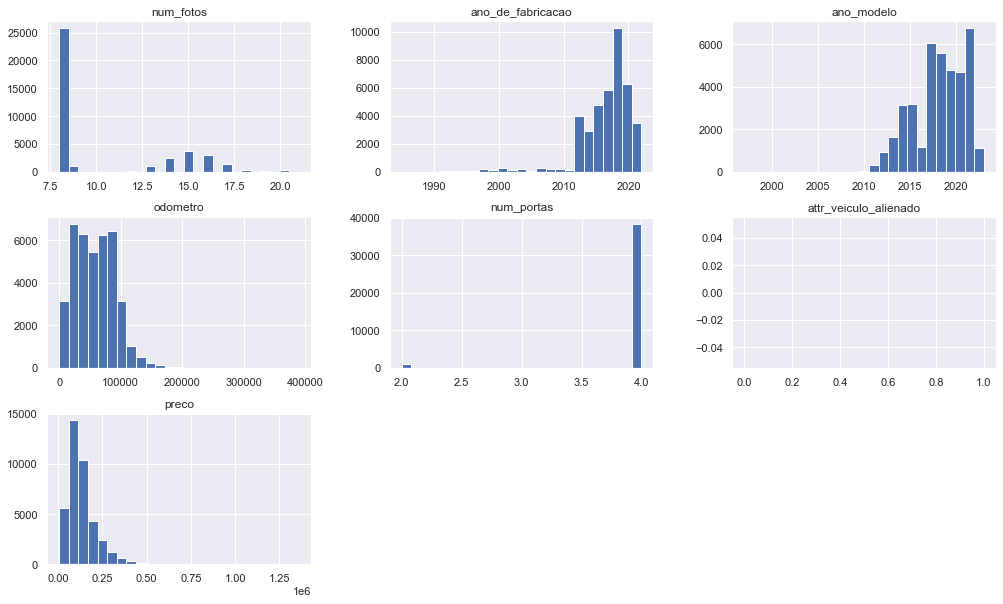

In [18]:
# num categorics
num_attributes.hist(bins=25); 

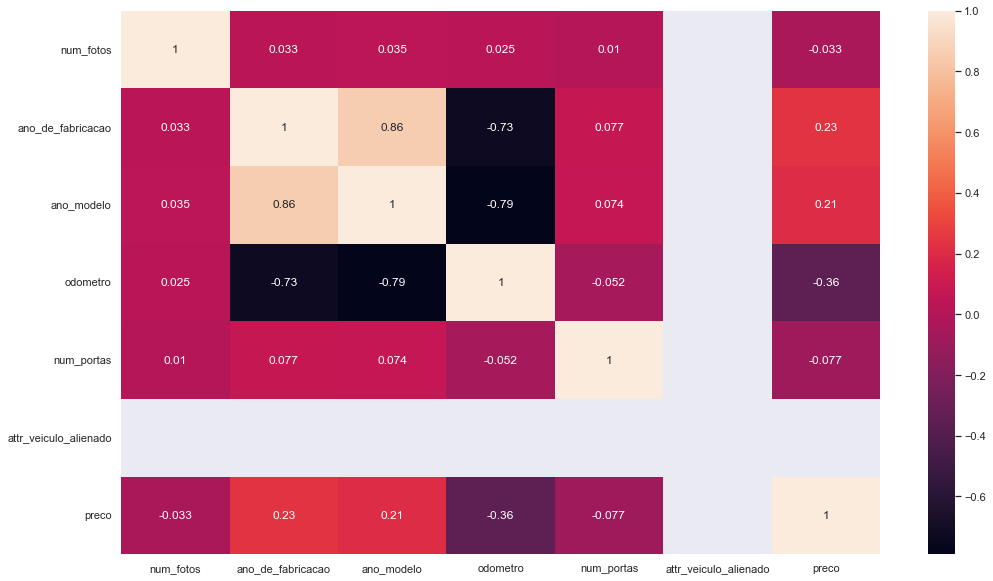

In [19]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

### 1.5.2. Categorical Attributes

In [20]:
cat_attributes.head()

,id,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,...,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_unico_dono,attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fabrica,attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro
0,105869496634249611881157692933406072990,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIE...,Automática,Picape,N,Preto,PF,São Paulo,...,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro
1,14165644411757892901957277406025007093,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,Automática,Utilitário esportivo,N,Branco,PF,Rio de Janeiro,...,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro
2,78515656948521351316652580664682810356,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,Automática,Sedã,N,Prata,PJ,Rio de Janeiro,...,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN
3,36797041166808090517929207429817328298,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,Automática,Picape,N,Branco,PF,São Paulo,...,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN
4,338618517701891995317200439137014723900,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,Automática,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,...,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro


In [21]:
# cat atributes
cat_attributes.apply( lambda x: x.unique().shape[0] )

id                                                            39446
marca                                                            41
modelo                                                          473
versao                                                         2058
cambio                                                            7
tipo                                                              8
blindado                                                          2
cor                                                               8
tipo_vendedor                                                     2
cidade_vendedor                                                 648
estado_vendedor                                                  25
tipo_anuncio                                                      4
entrega_delivery                                                  2
troca                                                             2
elegivel_revisao                                

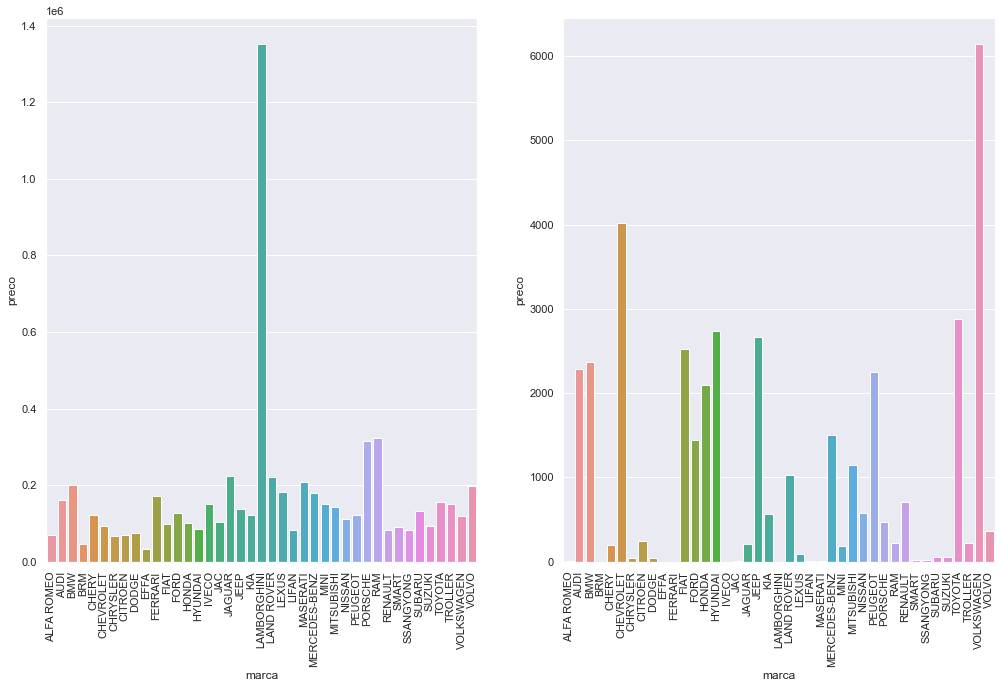

In [22]:
#marca mean ( REMOVER LAMBO para evitar OUTLIERS ) frequency enconding
plt.subplot(1 ,2 ,1 )
aux00 = df1[['marca' , 'preco']].groupby('marca').mean().reset_index()
sns.barplot( x='marca', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#marca count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['marca' , 'preco']].groupby('marca').count().reset_index()
sns.barplot( x='marca', y='preco', data=aux01 );
plt.xticks( rotation=90 );

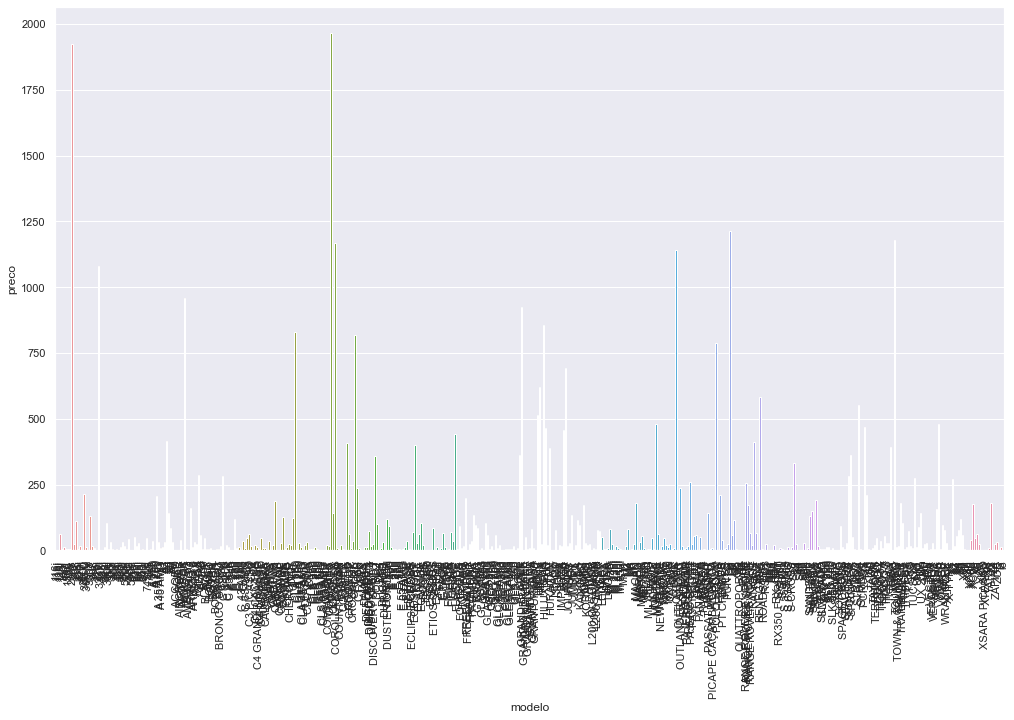

In [23]:
#modelo ( FREQUENCY ENCODING )
aux00 = df1[['modelo' , 'preco']].groupby('modelo').count().reset_index()
sns.barplot( x='modelo', y='preco', data=aux00 );
plt.xticks( rotation=90 );

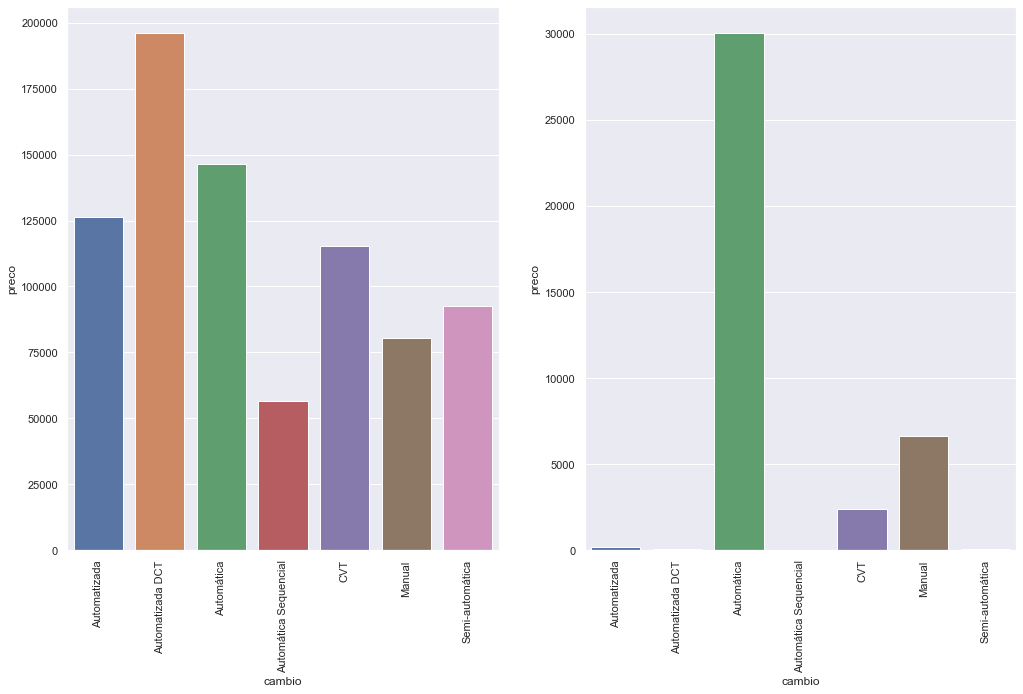

In [24]:
#cambio mean ( LABEL ENCODING )
plt.subplot(1 ,2 ,1 )
aux00 = df1[['cambio' , 'preco']].groupby('cambio').mean().reset_index()
sns.barplot( x='cambio', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#cambio count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['cambio' , 'preco']].groupby('cambio').count().reset_index()
sns.barplot( x='cambio', y='preco', data=aux01 );
plt.xticks( rotation=90 );

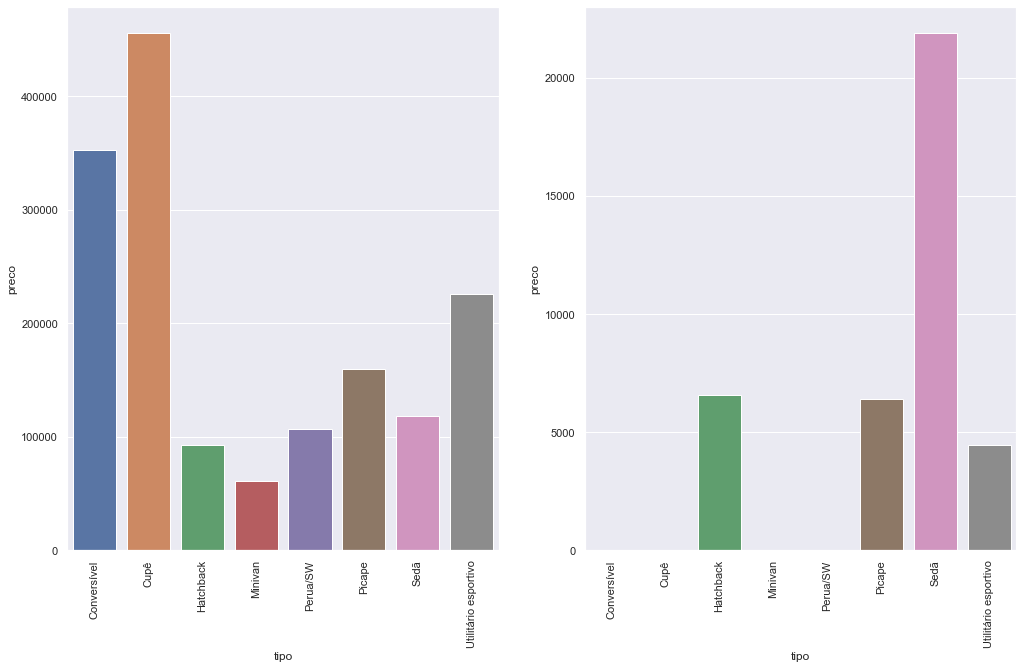

In [25]:
#tipo mean ( LABEL ENCODING )
plt.subplot(1 ,2 ,1 )
aux00 = df1[['tipo' , 'preco']].groupby('tipo').mean().reset_index()
sns.barplot( x='tipo', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#tipo count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['tipo' , 'preco']].groupby('tipo').count().reset_index()
sns.barplot( x='tipo', y='preco', data=aux01 );
plt.xticks( rotation=90 );

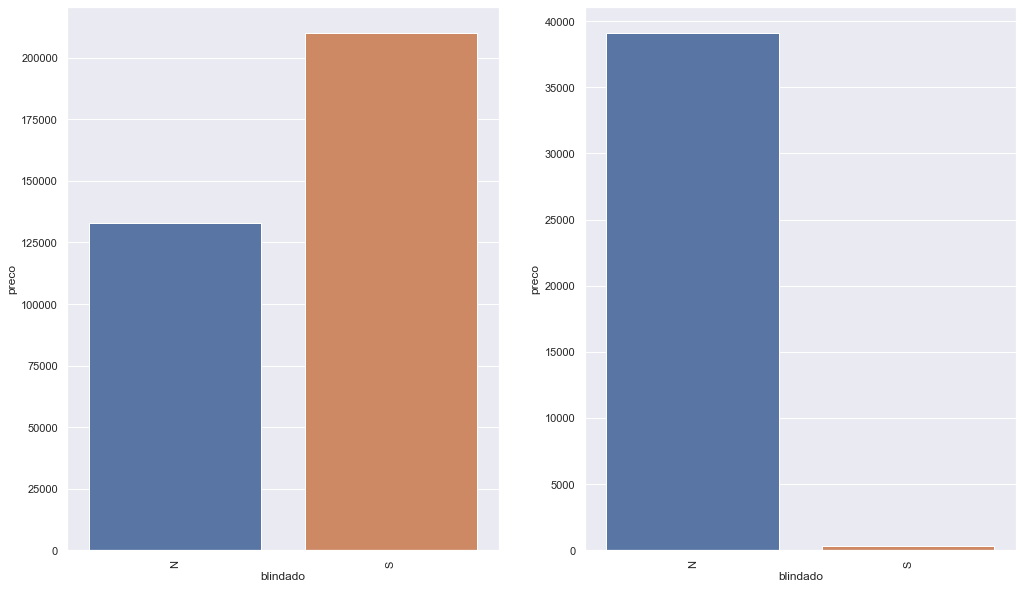

In [26]:
#blindado ( 0 or 1 ENCODING )
#blindado mean
plt.subplot(1 ,2 ,1 )
aux00 = df1[['blindado' , 'preco']].groupby('blindado').mean().reset_index()
sns.barplot( x='blindado', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#blindado count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['blindado' , 'preco']].groupby('blindado').count().reset_index()
sns.barplot( x='blindado', y='preco', data=aux01 );
plt.xticks( rotation=90 );

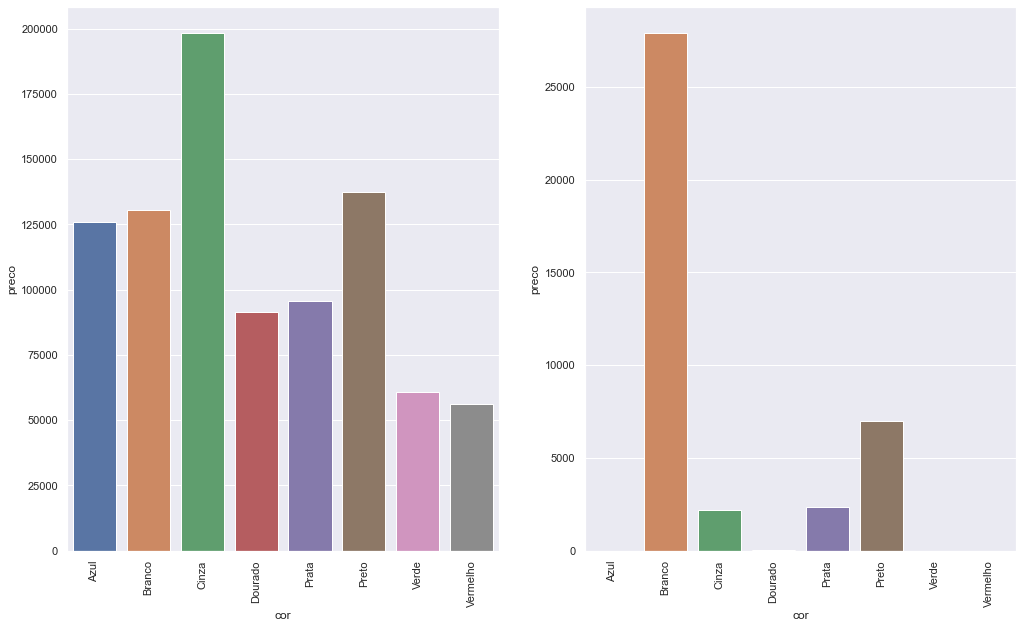

In [27]:
#cor ( LABEL/FREQUENCY ENCODING )
#cor mean
plt.subplot(1 ,2 ,1 )
aux00 = df1[['cor' , 'preco']].groupby('cor').mean().reset_index()
sns.barplot( x='cor', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#cor count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['cor' , 'preco']].groupby('cor').count().reset_index()
sns.barplot( x='cor', y='preco', data=aux01 );
plt.xticks( rotation=90 );

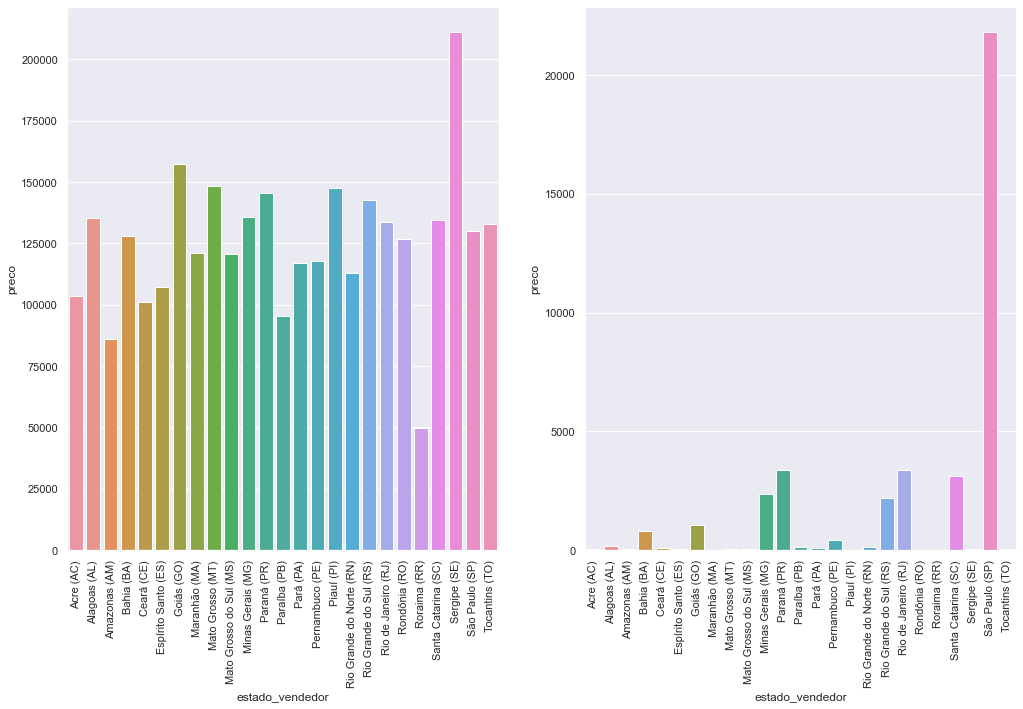

In [28]:
#estado_vendedor mean ( OUT )
plt.subplot(1 ,2 ,1 )
aux00 = df1[['estado_vendedor' , 'preco']].groupby('estado_vendedor').mean().reset_index()
sns.barplot( x='estado_vendedor', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#estado_vendedor count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['estado_vendedor' , 'preco']].groupby('estado_vendedor').count().reset_index()
sns.barplot( x='estado_vendedor', y='preco', data=aux01 );
plt.xticks( rotation=90 );

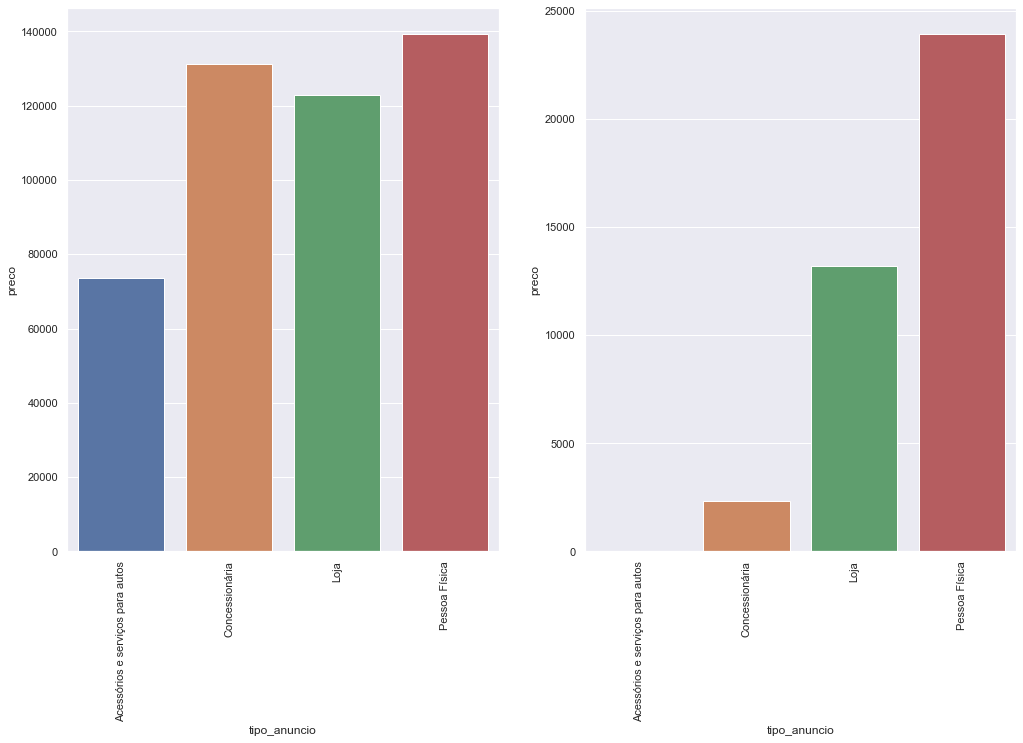

In [29]:
#tipo_anuncio mean ( LABEL ENCODING ) 
plt.subplot(1 ,2 ,1 )
aux00 = df1[['tipo_anuncio' , 'preco']].groupby('tipo_anuncio').mean().reset_index()
sns.barplot( x='tipo_anuncio', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#tipo_anuncio count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['tipo_anuncio' , 'preco']].groupby('tipo_anuncio').count().reset_index()
sns.barplot( x='tipo_anuncio', y='preco', data=aux01 );
plt.xticks( rotation=90 );

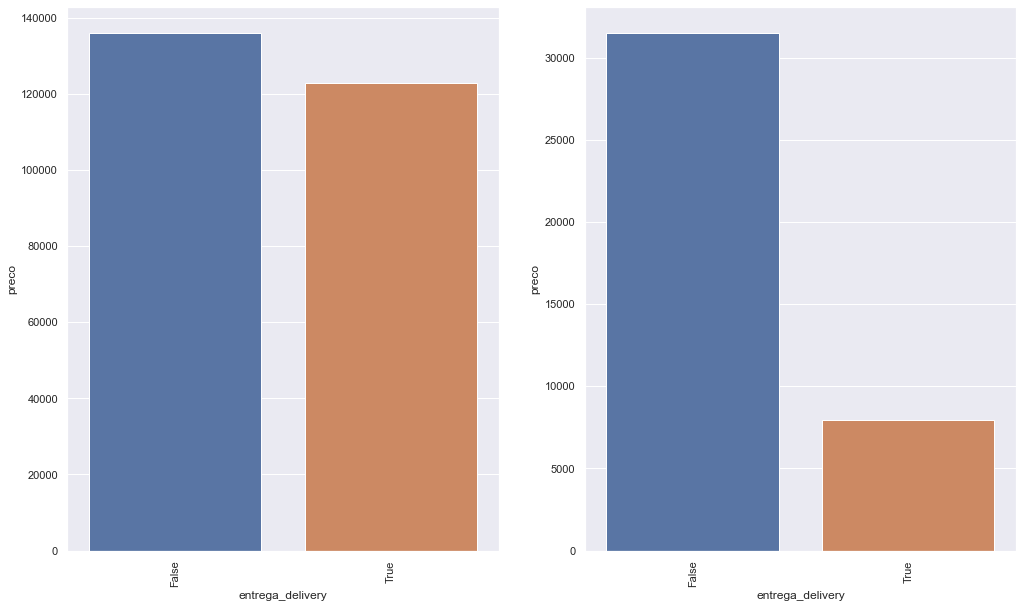

In [30]:
# entrega_delivery sum ( 0 or  1 )
plt.subplot(1 ,2 ,1 )
aux00 = df1[['entrega_delivery' , 'preco']].groupby('entrega_delivery').mean().reset_index()
sns.barplot( x='entrega_delivery', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#entrega_delivery count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['entrega_delivery' , 'preco']].groupby('entrega_delivery').count().reset_index()
sns.barplot( x='entrega_delivery', y='preco', data=aux01 );
plt.xticks( rotation=90 );

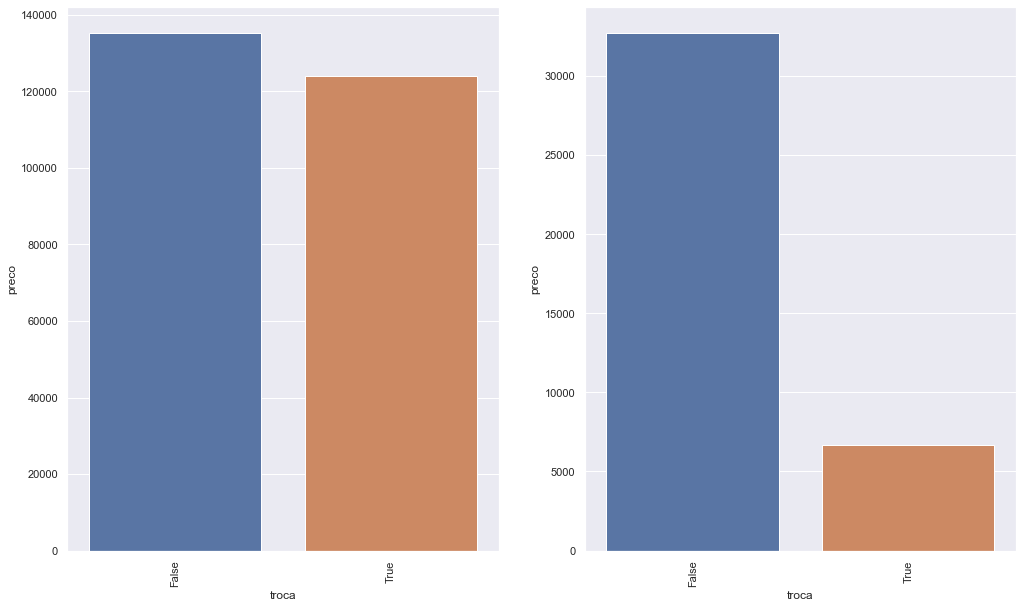

In [31]:
# troca ( 0 or 1 )    
plt.subplot(1 ,2 ,1 )
aux00 = df1[['troca' , 'preco']].groupby('troca').mean().reset_index()
sns.barplot( x='troca', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#troca count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['troca' , 'preco']].groupby('troca').count().reset_index()
sns.barplot( x='troca', y='preco', data=aux01 );
plt.xticks( rotation=90 );

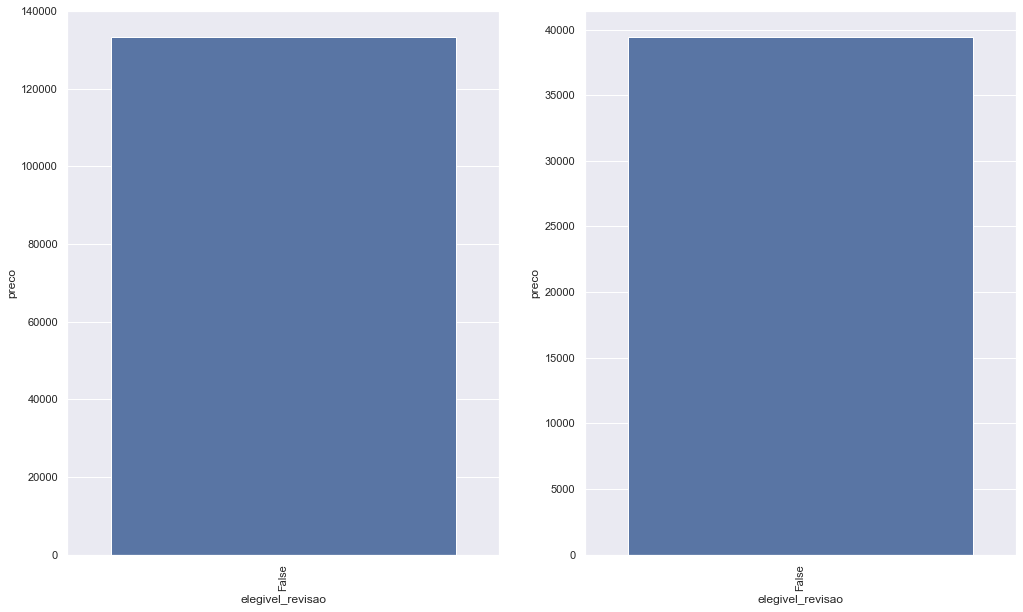

In [32]:
# elegivel_revisao ( OUT )
plt.subplot(1 ,2 ,1 )
aux00 = df1[['elegivel_revisao' , 'preco']].groupby('elegivel_revisao').mean().reset_index()
sns.barplot( x='elegivel_revisao', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#elegivel_revisao count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['elegivel_revisao' , 'preco']].groupby('elegivel_revisao').count().reset_index()
sns.barplot( x='elegivel_revisao', y='preco', data=aux01 );
plt.xticks( rotation=90 ); 

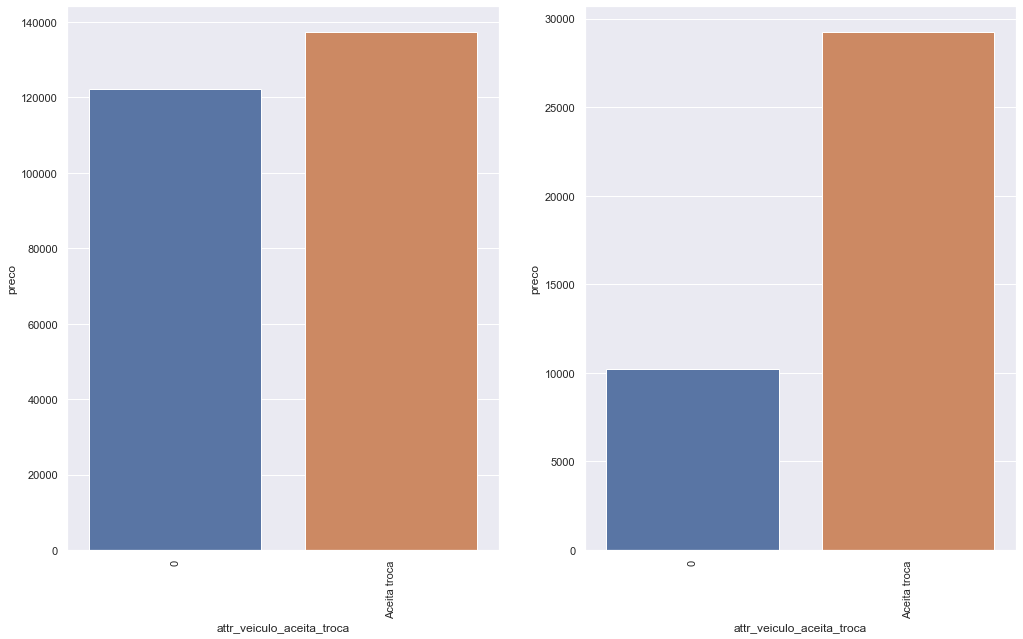

In [33]:
# attr_veiculo_aceita_troca ( or 0 1 )
df1['attr_veiculo_aceita_troca'] = df1['attr_veiculo_aceita_troca'].fillna(0) # preenche as linhas vazias
# attr_veiculo_aceita_troca sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_aceita_troca' , 'preco']].groupby('attr_veiculo_aceita_troca').mean().reset_index()
sns.barplot( x='attr_veiculo_aceita_troca', y='preco', data=aux00 );
plt.xticks( rotation=90 );
#attr_veiculo_aceita_troca count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_aceita_troca' , 'preco']].groupby('attr_veiculo_aceita_troca').count().reset_index()
sns.barplot( x='attr_veiculo_aceita_troca', y='preco', data=aux01 );
plt.xticks( rotation=90 );

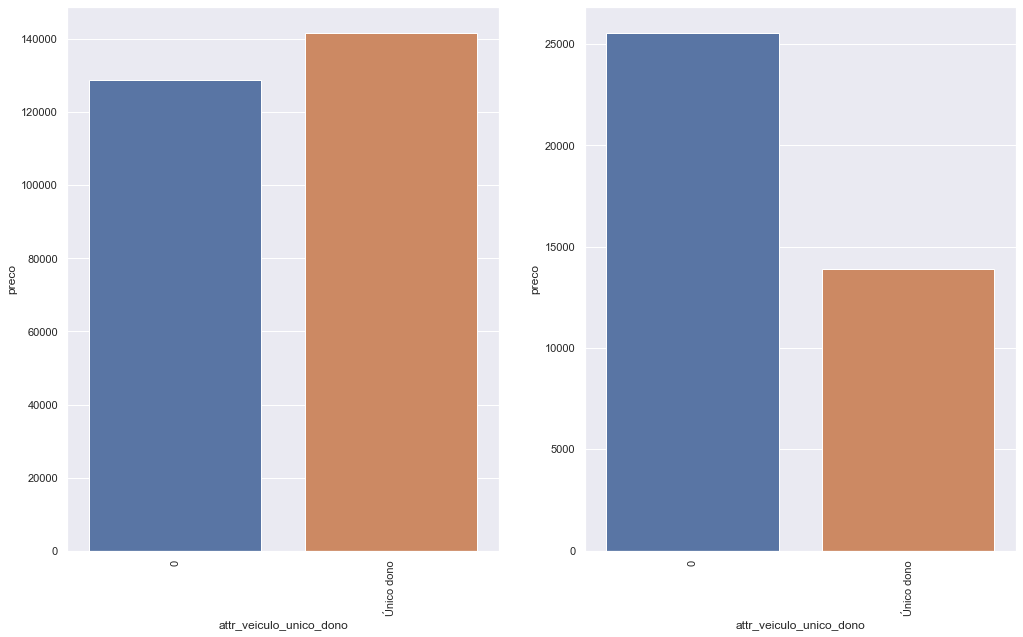

In [34]:
# attr_veiculo_unico_dono (  0 or 1 )
df1['attr_veiculo_unico_dono'] = df1['attr_veiculo_unico_dono'].fillna(0) # preenche as linhas vazias

# attr_veiculo_unico_dono sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_unico_dono' , 'preco']].groupby('attr_veiculo_unico_dono').mean().reset_index()
sns.barplot( x='attr_veiculo_unico_dono', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_unico_dono count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_unico_dono' , 'preco']].groupby('attr_veiculo_unico_dono').count().reset_index()
sns.barplot( x='attr_veiculo_unico_dono', y='preco', data=aux01 );
plt.xticks( rotation=90 );

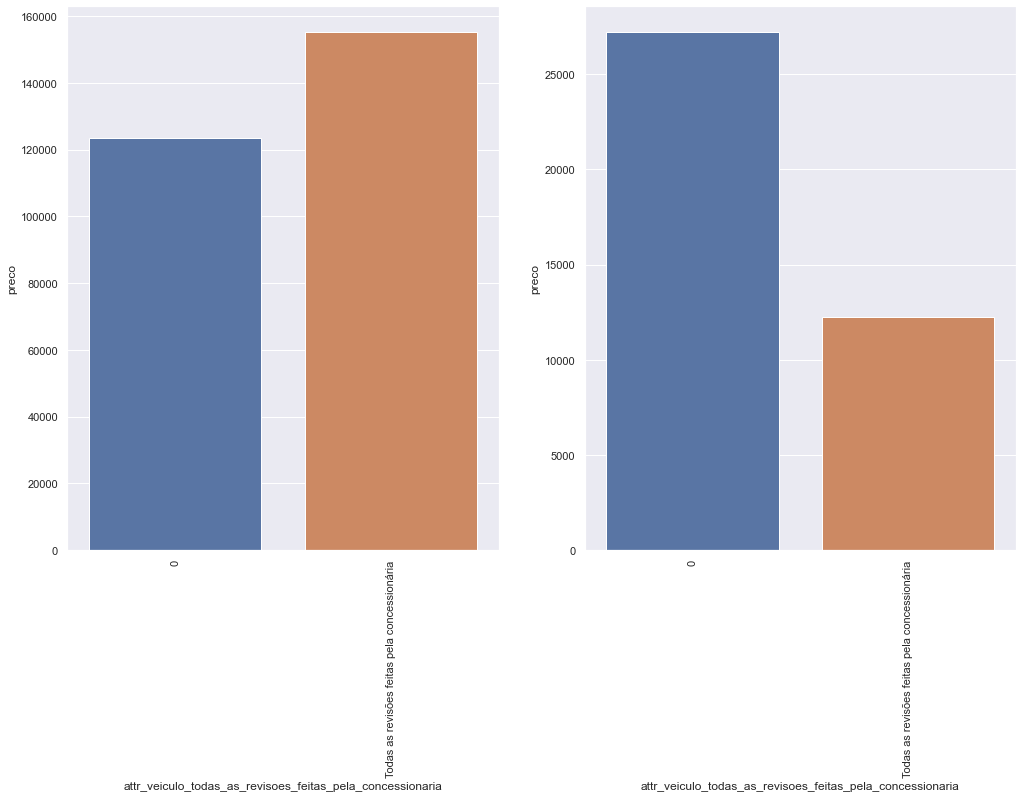

In [35]:
# attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria ( 0 or 1 )  
 
# attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria 
df1['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'] = df1['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'].fillna(0) # preenche as linhas vazias

# attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria' , 'preco']].groupby('attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria').mean().reset_index()
sns.barplot( x='attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria' , 'preco']].groupby('attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria').count().reset_index()
sns.barplot( x='attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria', y='preco', data=aux01 );
plt.xticks( rotation=90 );

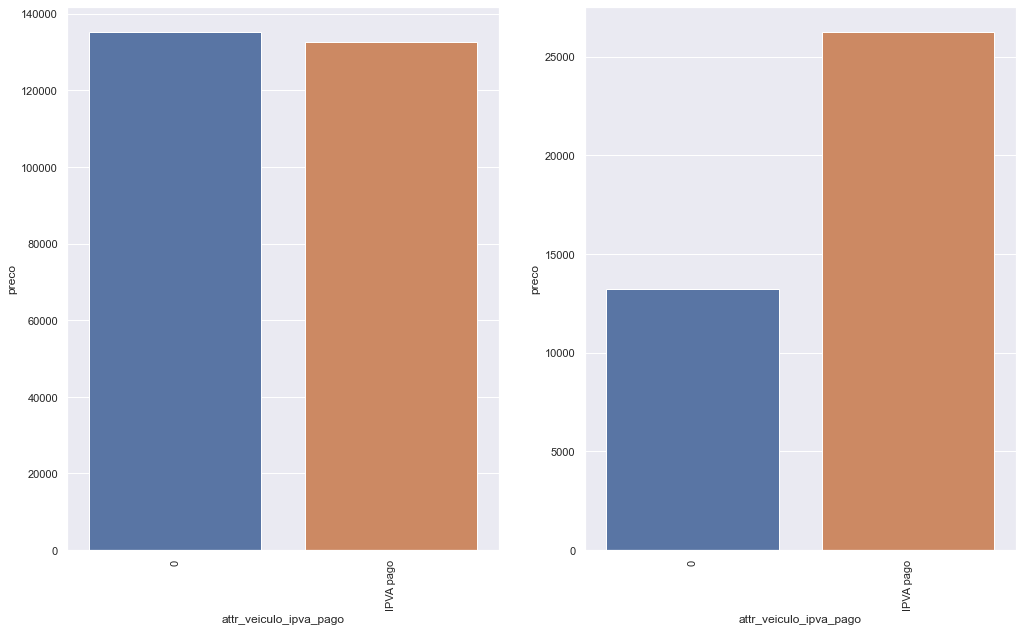

In [36]:
# attr_veiculo_ipva_pago ( OUT )
df1['attr_veiculo_ipva_pago'] = df1['attr_veiculo_ipva_pago'].fillna(0) # preenche as linhas vazias

# attr_veiculo_ipva_pago sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_ipva_pago' , 'preco']].groupby('attr_veiculo_ipva_pago').mean().reset_index()
sns.barplot( x='attr_veiculo_ipva_pago', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_ipva_pago count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_ipva_pago' , 'preco']].groupby('attr_veiculo_ipva_pago').count().reset_index()
sns.barplot( x='attr_veiculo_ipva_pago', y='preco', data=aux01 );
plt.xticks( rotation=90 );

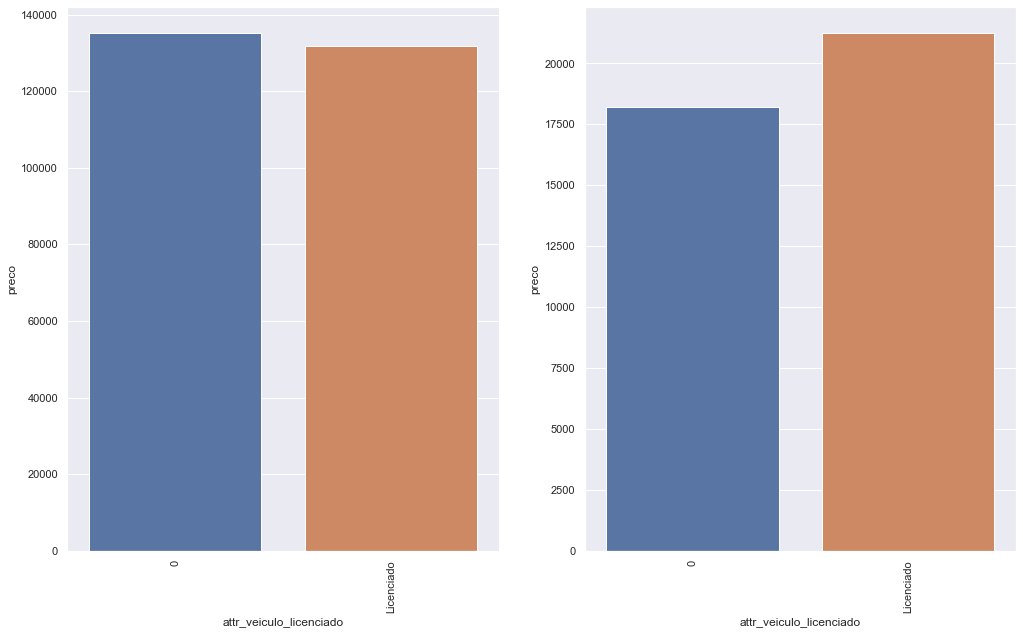

In [37]:
# attr_veiculo_licenciado ( OUT )
df1['attr_veiculo_licenciado'] = df1['attr_veiculo_licenciado'].fillna(0) # preenche as linhas vazias

# attr_veiculo_licenciado sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_licenciado' , 'preco']].groupby('attr_veiculo_licenciado').mean().reset_index()
sns.barplot( x='attr_veiculo_licenciado', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_licenciado count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_licenciado' , 'preco']].groupby('attr_veiculo_licenciado').count().reset_index()
sns.barplot( x='attr_veiculo_licenciado', y='preco', data=aux01 );
plt.xticks( rotation=90 ); 

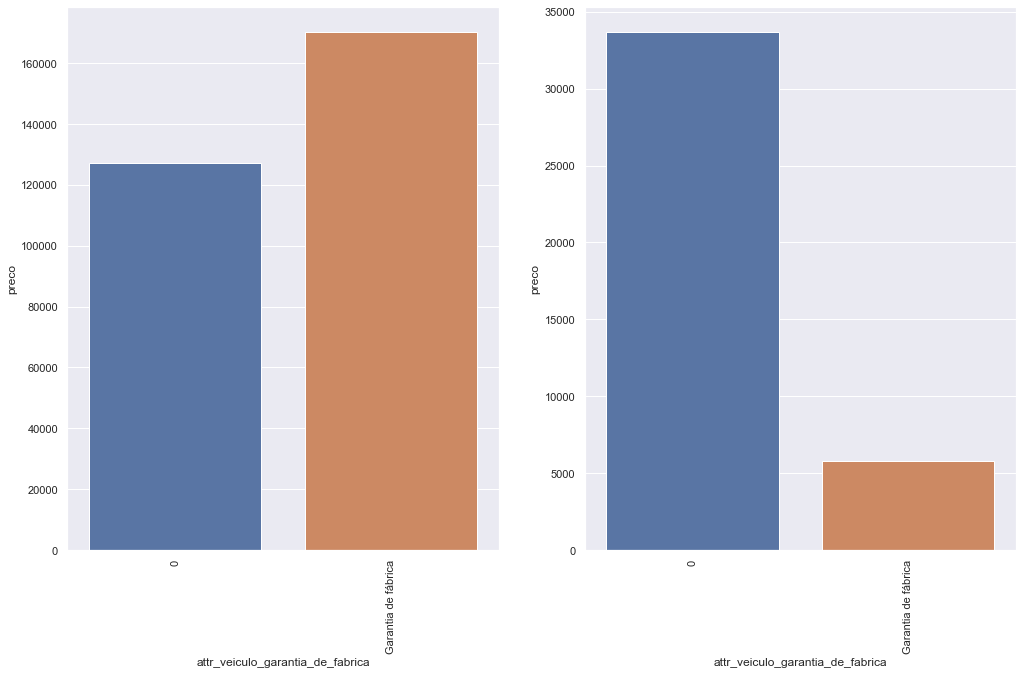

In [38]:
# attr_veiculo_garantia_de_fabrica ( 0 or 1 ) 
df1['attr_veiculo_garantia_de_fabrica'] = df1['attr_veiculo_garantia_de_fabrica'].fillna(0) # preenche as linhas vazias

# attr_veiculo_garantia_de_fabrica sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_garantia_de_fabrica' , 'preco']].groupby('attr_veiculo_garantia_de_fabrica').mean().reset_index()
sns.barplot( x='attr_veiculo_garantia_de_fabrica', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_garantia_de_fabrica count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_garantia_de_fabrica' , 'preco']].groupby('attr_veiculo_garantia_de_fabrica').count().reset_index()
sns.barplot( x='attr_veiculo_garantia_de_fabrica', y='preco', data=aux01 );
plt.xticks( rotation=90 ); 

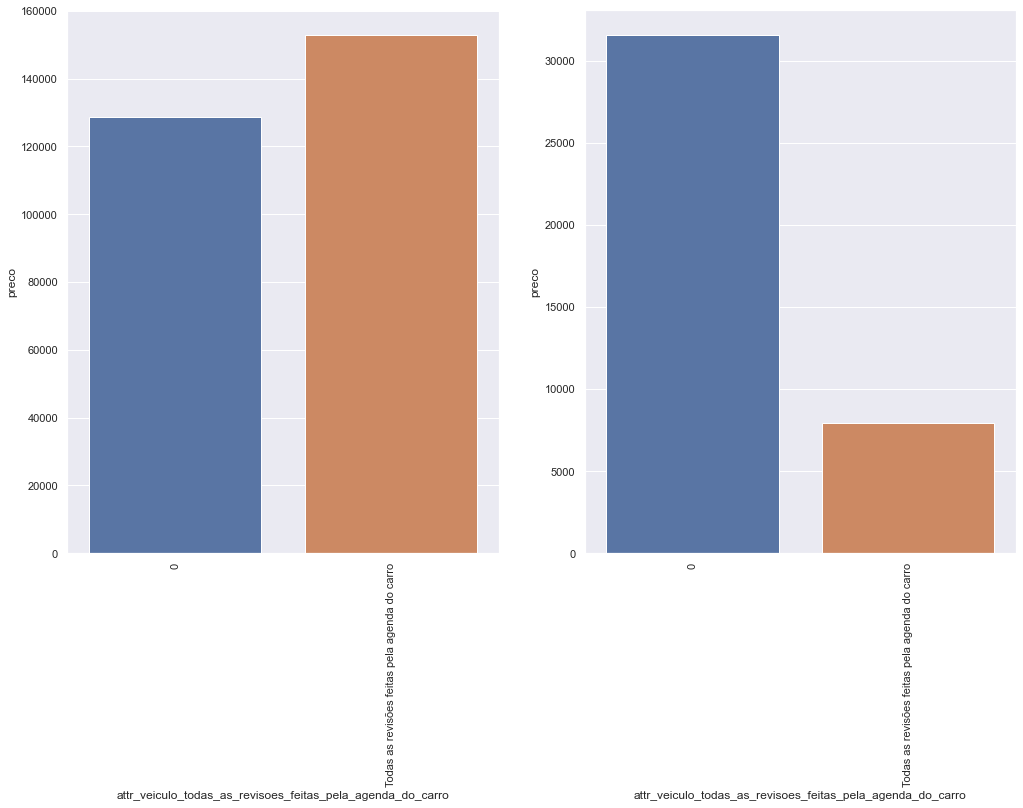

In [39]:
# attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro ( OUT correlacao alta com revisao concessionaria )
df1['attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro'] = df1['attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro'].fillna(0) # preenche as linhas vazias

# attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro' , 'preco']].groupby('attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro').mean().reset_index()
sns.barplot( x='attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro' , 'preco']].groupby('attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro').count().reset_index()
sns.barplot( x='attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro', y='preco', data=aux01 );
plt.xticks( rotation=90 ); 

### 1.5.2.1. Categorical Attributes POTENCIA

In [40]:
# atribui 'ELÉTRICO' para a versao se tiver 'ELECTRIC' ou 'ELETRIC'
x = lambda x: 'ELÉTRICO' if ('ELÉTRICO') in x['versao'] else 'ELÉTRICO' if ('ELECTRIC') in x['versao'] else x['versao']
df1['versao'] = df1.apply(x, axis =1)

# extrai o valor da potencia
df1['potencia'] = df1['versao'].str.split(expand = True)[0]

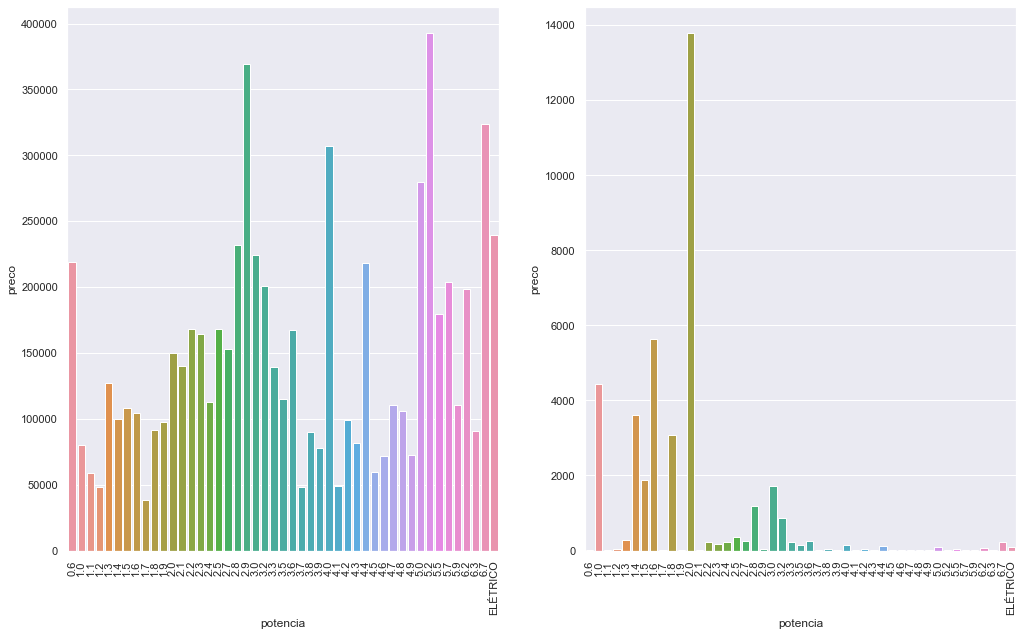

In [41]:
# potencia ( FREQUENCY ENCODING  )

# realizamos um split da feature version e detectamos outras possíveis

# potencia sum
plt.subplot(1 ,2 ,1 )
aux00 = df1[['potencia' , 'preco']].groupby('potencia').mean().reset_index()
sns.barplot( x='potencia', y='preco', data=aux00 );
plt.xticks( rotation=90 );

#potencia count
plt.subplot(1 ,2 ,2 )
aux01 = df1[['potencia' , 'preco']].groupby('potencia').count().reset_index()
sns.barplot( x='potencia', y='preco', data=aux01 );
plt.xticks( rotation=90 ); 

# 2.0. FEATURE ENGINEERING

In [42]:
df2 = df1.copy()

In [43]:
# REMOVER LAMBO para evitar OUTLIERS
df2 = df2.query("marca != 'LAMBORGHINI'").copy()

In [44]:
#fe_marca

NameError: name 'fe_marca' is not defined

In [45]:
fe_marca = df2.groupby('marca').size() / len(df2)
x = lambda x: fe_marca[x] if x in fe_marca.index else 0 
df2['marca'] = df2['marca'].apply(x)

#le_marca = preprocessing.LabelEncoder()
#df2['marca'] = le_marca.fit_transform(df2['marca'])

fe_modelo = df2.groupby('modelo').size() / len(df2)
x = lambda x: fe_modelo[x] if x in fe_modelo.index else 0 
df2['modelo'] = df2['modelo'].apply(x)

le_cambio = preprocessing.LabelEncoder()
df2['cambio'] = le_cambio.fit_transform(df2['cambio'])

le_tipo = preprocessing.LabelEncoder()
df2['tipo'] = le_tipo.fit_transform(df2['tipo'])

le_blindado = preprocessing.LabelEncoder()
df2['blindado'] = le_blindado.fit_transform(df2['blindado'])

# para v2 testar o ordinal enconding 
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder(handle_unknown='ignore', unknown_value=np.nan)
fe_cor = df2.groupby('cor').size() / len(df2)
x = lambda x: fe_cor[x] if x in fe_cor.index else 0 
df2['cor'] = df2['cor'].apply(x)

#le_cor = preprocessing.LabelEncoder()
#df2['cor'] = le_cor.fit_transform(df2['cor'])

le_tipo_anuncio = preprocessing.LabelEncoder()
df2['tipo_anuncio'] = le_tipo_anuncio.fit_transform(df2['tipo_anuncio'])

le_entrega_delivery = preprocessing.LabelEncoder()
df2['entrega_delivery'] = le_entrega_delivery.fit_transform(df2['entrega_delivery'])

le_troca = preprocessing.LabelEncoder()
df2['troca'] = le_troca.fit_transform(df2['troca'])

df2['attr_veiculo_aceita_troca'] = df2['attr_veiculo_aceita_troca'].replace("Aceita troca", 1)

df2['attr_veiculo_unico_dono'] = df2['attr_veiculo_unico_dono'].replace("Único dono", 1)

df2['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'] = df2['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'].replace("Todas as revisões feitas pela concessionária", 1)

df2['attr_veiculo_garantia_de_fabrica'] = df2['attr_veiculo_garantia_de_fabrica'].replace("Garantia de fábrica", 1)

fe_potencia = df2.groupby('potencia').size() / len(df2)
x = lambda x: fe_potencia[x] if x in fe_potencia.index else 0 
df2['potencia'] = df2['potencia'].apply(x)

mms_ano_fabricacao = MinMaxScaler()
df2['ano_de_fabricacao'] = mms_ano_fabricacao.fit_transform(df2[['ano_de_fabricacao']])

mms_ano_modelo = MinMaxScaler()
df2['ano_modelo'] = mms_ano_modelo.fit_transform(df2[['ano_modelo']])

mms_odometro = MinMaxScaler()
df2['odometro'] = mms_odometro.fit_transform(df2[['odometro']])

# 3.0 Columns selection

In [46]:
df3 = df2.copy()

In [47]:
df2.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_unico_dono',
       'attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fabrica',
       'attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro',
       'attr_veiculo_alienado', 'preco', 'potencia'],
      dtype='object')

In [48]:
df3 = df3[['id', 
          'marca', 
          'modelo', 
          'potencia',
          'ano_de_fabricacao',
          'ano_modelo', 
          'odometro', 
          'cambio', 
          'tipo', 
          'blindado', 
          'cor', 
          'tipo_anuncio', 
          'entrega_delivery', 
          'troca', 
          'attr_veiculo_aceita_troca',
          'attr_veiculo_unico_dono','attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria', 
          'attr_veiculo_garantia_de_fabrica', 
          'preco']]

In [49]:
df3

,id,marca,modelo,potencia,ano_de_fabricacao,ano_modelo,odometro,cambio,tipo,blindado,cor,tipo_anuncio,entrega_delivery,troca,attr_veiculo_aceita_troca,attr_veiculo_unico_dono,attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria,attr_veiculo_garantia_de_fabrica,preco
0,105869496634249611881157692933406072990,0.155660,0.024287,0.349753,0.864865,0.769231,0.142505,2,5,0,0.177082,3,0,0,1,0,1,0,123231.992782
1,14165644411757892901957277406025007093,0.005375,0.001724,0.349753,0.864865,0.769231,0.122467,2,7,0,0.707770,3,0,0,1,0,1,0,272076.023576
2,78515656948521351316652580664682810356,0.101914,0.020712,0.077957,0.729730,0.615385,0.313420,2,6,0,0.059805,2,1,1,1,0,0,0,53411.539492
3,36797041166808090517929207429817328298,0.011915,0.001166,0.349753,0.945946,0.923077,0.036175,2,5,0,0.707770,3,0,0,1,0,1,0,299697.071937
4,338618517701891995317200439137014723900,0.009203,0.001192,0.349753,0.810811,0.730769,0.111959,2,7,0,0.177082,3,0,0,1,0,1,0,255164.344178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,157824515938867248356804878732621234459,0.155660,0.005045,0.143060,0.810811,0.692308,0.188876,5,6,0,0.059805,2,0,0,1,1,0,0,146046.941064
39442,177911194444464888148331800784702968538,0.060210,0.001623,0.349753,0.837838,0.769231,0.201964,2,2,0,0.707770,2,1,1,1,0,0,0,106899.996631
39443,118125566636892534226795833948655676521,0.056940,0.048777,0.143060,0.972973,0.961538,0.024856,2,6,0,0.055115,3,0,0,0,1,1,1,173246.622938
39444,177498527521608142997254686794131648613,0.155660,0.024287,0.349753,0.891892,0.846154,0.132043,2,6,0,0.707770,1,1,0,1,0,0,0,221671.795447


# 4.0 Machine learning modeling

In [50]:
X = df3.drop(['preco', 'id'], axis = 1)
y = df3['preco']

In [51]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [53]:
data_teste= pd.read_csv("datasets/teste.csv")
data_teste.head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,...,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado
0,24813264385557040124808779273028388499,14.0,CHEVROLET,SPIN,1.8 LTZ 8V FLEX 4P AUTOMÁTICO,2017,2017.0,62969.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,295636316453795508942188530111300065666,8.0,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2021,2021.0,26324.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,101258309166227950735244624080888109884,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2019,2020.0,37002.0,Automática,4,...,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN
3,28348734455782469411126661985772047409,15.0,CHEVROLET,TRACKER,1.8 MPFI LTZ 4X2 16V FLEX 4P AUTOMÁTICO,2012,2015.0,86762.0,Automática,4,...,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193163160502972147671913739170248305797,8.0,BMW,120i,2.0 16V SPORT ACTIVEFLEX 4P AUTOMÁTICO,2015,2017.0,93040.0,Automática,4,...,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


In [54]:
cols_new = ['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_unico_dono',
       'attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fabrica',
       'attr_veiculo_todas_as_revisoes_feitas_pela_agenda_do_carro',
       'attr_veiculo_alienado']

data_teste.columns = cols_new


# atribui 'ELÉTRICO' para a versao se tiver 'ELECTRIC' ou 'ELETRIC'
x = lambda x: 'ELÉTRICO' if ('ELÉTRICO') in x['versao'] else 'ELÉTRICO' if ('ELECTRIC') in x['versao'] else x['versao']
data_teste['versao'] = data_teste.apply(x, axis =1)

# extrai o valor da potencia
data_teste['potencia'] = data_teste['versao'].str.split(expand = True)[0]



data_teste['attr_veiculo_unico_dono'] = data_teste['attr_veiculo_unico_dono'].fillna(0) # preenche as linhas vazias
data_teste['attr_veiculo_aceita_troca'] = data_teste['attr_veiculo_aceita_troca'].fillna(0) # preenche as linhas vazias
data_teste['attr_veiculo_garantia_de_fabrica'] = data_teste['attr_veiculo_garantia_de_fabrica'].fillna(0) # preenche as linhas vazias
data_teste['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'] = data_teste['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'].fillna(0) # preenche as linhas vazias

x = lambda x: fe_marca[x] if x in fe_marca.index else 0 
data_teste['marca'] = data_teste['marca'].apply(x)

x = lambda x: fe_modelo[x] if x in fe_modelo.index else 0 
data_teste['modelo'] = data_teste['modelo'].apply(x)

data_teste['cambio'] = le_cambio.transform(data_teste['cambio'])

data_teste['tipo'] = le_tipo.transform(data_teste['tipo'])

data_teste['blindado'] = le_blindado.transform(data_teste['blindado'])

# testar com frequency para v2
x = lambda x: fe_cor[x] if x in fe_cor.index else 0 
data_teste['cor'] = data_teste['cor'].apply(x)

data_teste['tipo_anuncio'] = le_tipo_anuncio.transform(data_teste['tipo_anuncio'])

data_teste['entrega_delivery'] = le_entrega_delivery.transform(data_teste['entrega_delivery'])

data_teste['troca'] = le_troca.transform(data_teste['troca'])

data_teste['attr_veiculo_aceita_troca'] = data_teste['attr_veiculo_aceita_troca'].replace("Aceita troca", 1)

data_teste['attr_veiculo_unico_dono'] = data_teste['attr_veiculo_unico_dono'].replace("Único dono", 1)

data_teste['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'] = data_teste['attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria'].replace("Todas as revisões feitas pela concessionária", 1)

data_teste['attr_veiculo_garantia_de_fabrica'] = data_teste['attr_veiculo_garantia_de_fabrica'].replace("Garantia de fábrica", 1)

x = lambda x: fe_potencia[x] if x in fe_potencia.index else 0 
data_teste['potencia'] = data_teste['potencia'].apply(x)

data_teste['ano_de_fabricacao'] = mms_ano_fabricacao.transform(data_teste[['ano_de_fabricacao']])

data_teste['ano_modelo'] = mms_ano_modelo.transform(data_teste[['ano_modelo']])

data_teste['odometro'] = mms_odometro.transform(data_teste[['odometro']])

In [55]:
data_teste = data_teste[['id', 
          'marca', 
          'modelo', 
          'potencia',
          'ano_de_fabricacao',
          'ano_modelo', 
          'odometro', 
          'cambio', 
          'tipo', 
          'blindado', 
          'cor', 
          'tipo_anuncio', 
          'entrega_delivery', 
          'troca', 
          'attr_veiculo_aceita_troca',
          'attr_veiculo_unico_dono','attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria', 
          'attr_veiculo_garantia_de_fabrica']]

In [56]:
yhat = model_xgb.predict(data_teste.drop('id', axis = 1))
yhat

array([ 70087.375, 110097.58 ,  90268.695, ..., 145500.62 , 246281.31 ,
        59452.504], dtype=float32)

In [57]:
df_submission = pd.DataFrame({'ID': data_teste['id'], 'preco':yhat})
df_submission

,ID,preco
0,24813264385557040124808779273028388499,70087.375000
1,295636316453795508942188530111300065666,110097.578125
2,101258309166227950735244624080888109884,90268.695312
3,28348734455782469411126661985772047409,73518.500000
4,193163160502972147671913739170248305797,118533.640625
...,...,...
39441,238233399351588823822117090805568390727,43350.632812
39442,64621912306231118962468441892654163025,150687.500000
39443,100311033226508317456901122129284293382,145500.625000
39444,217317181330151694133399005110777689124,246281.312500


In [58]:
df_submission.to_csv('ducks.csv')

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
df3

,id,marca,modelo,potencia,ano_de_fabricacao,ano_modelo,odometro,cambio,tipo,blindado,cor,tipo_anuncio,entrega_delivery,troca,attr_veiculo_aceita_troca,attr_veiculo_unico_dono,attr_veiculo_todas_as_revisoes_feitas_pela_concessionaria,attr_veiculo_garantia_de_fabrica,preco
0,105869496634249611881157692933406072990,0.155660,0.024287,0.349753,0.864865,0.769231,0.142505,2,5,0,0.177082,3,0,0,1,0,1,0,123231.992782
1,14165644411757892901957277406025007093,0.005375,0.001724,0.349753,0.864865,0.769231,0.122467,2,7,0,0.707770,3,0,0,1,0,1,0,272076.023576
2,78515656948521351316652580664682810356,0.101914,0.020712,0.077957,0.729730,0.615385,0.313420,2,6,0,0.059805,2,1,1,1,0,0,0,53411.539492
3,36797041166808090517929207429817328298,0.011915,0.001166,0.349753,0.945946,0.923077,0.036175,2,5,0,0.707770,3,0,0,1,0,1,0,299697.071937
4,338618517701891995317200439137014723900,0.009203,0.001192,0.349753,0.810811,0.730769,0.111959,2,7,0,0.177082,3,0,0,1,0,1,0,255164.344178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,157824515938867248356804878732621234459,0.155660,0.005045,0.143060,0.810811,0.692308,0.188876,5,6,0,0.059805,2,0,0,1,1,0,0,146046.941064
39442,177911194444464888148331800784702968538,0.060210,0.001623,0.349753,0.837838,0.769231,0.201964,2,2,0,0.707770,2,1,1,1,0,0,0,106899.996631
39443,118125566636892534226795833948655676521,0.056940,0.048777,0.143060,0.972973,0.961538,0.024856,2,6,0,0.055115,3,0,0,0,1,1,1,173246.622938
39444,177498527521608142997254686794131648613,0.155660,0.024287,0.349753,0.891892,0.846154,0.132043,2,6,0,0.707770,1,1,0,1,0,0,0,221671.795447


In [64]:
pred = model_xgb.predict(df3.drop(['id','preco'], axis = 1))

### MAE = 23303.78939946976

In [65]:
mean_absolute_error(df3.preco, pred)

23303.78939946976

## Random Search

In [66]:
X = df3.drop(['id','preco'], axis = 1)
y = df3.preco

O valor de MAE encontrado foi 27514.15, muito parecido com o encontrado no Kaggle 27235.64155

In [70]:
# cross-validate the pipeline using default parameters
from sklearn.model_selection import cross_val_score
MAE = cross_val_score(model_xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'MAE results = {MAE}')
print(f'MAE mean: {MAE.mean()}')

MAE results = [-27645.27956576 -27391.26450509 -27095.80827716 -27696.16962909
 -27742.21662638]
MAE mean: -27514.14772069516


Agora preciso fazer o random search

In [71]:
# specify parameter values to search (use a distribution for any continuous parameters)
# param = {'n_estimators': [ 1500, 1700, 2500, 3000, 3500],
#          'eta': [ 0.01, 0.03],
#          'max_depth': [3, 5, 9],
#          'subsample': [0.1, 0.5, 0.7],
#          'colsample_bytree': [0.3, 0.5, 0.9],
#          'min_child_weight': [3, 8, 15]
#          }

param = {'n_estimators': [ 1500, 1700, 2500, 3000, 3500],
         'eta': [ 0.01, 0.03],
         }

In [72]:
# try "n_iter" random combinations of those parameter values
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(model_xgb, param, n_iter=4, cv=5, scoring='neg_mean_absolute_error', random_state=1)
rand.fit(X, y)

KeyboardInterrupt: 